In [ ]:
# Perform connected components analysis with statistics
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image)

# Display the number of components found
print(f"Number of connected components (including background): {num_labels}")

# Show statistics for each component
for label in range(1, num_labels):  # Skip the background (label 0)
    print(f"Component {label}:")
    print(f"  - Area: {stats[label, cv2.CC_STAT_AREA]}")
    print(f"  - Bounding box: (x: {stats[label, cv2.CC_STAT_LEFT]}, y: {stats[label, cv2.CC_STAT_TOP]}, width: {stats[label, cv2.CC_STAT_WIDTH]}, height: {stats[label, cv2.CC_STAT_HEIGHT]})")
    print(f"  - Centroid: {centroids[label]}")


In [3]:
pip install networkx

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 100.9 kB/s eta 0:00:21
    --------------------------------------- 0.0/2.1 MB 100.9 kB/s eta 0:00:21
    --------------------------------------- 0.0/2.1 MB 103.4 kB/s eta 0:00:20
    --------------------------------------- 0.0/2.1 MB 103.4 kB/s eta 0:00:2

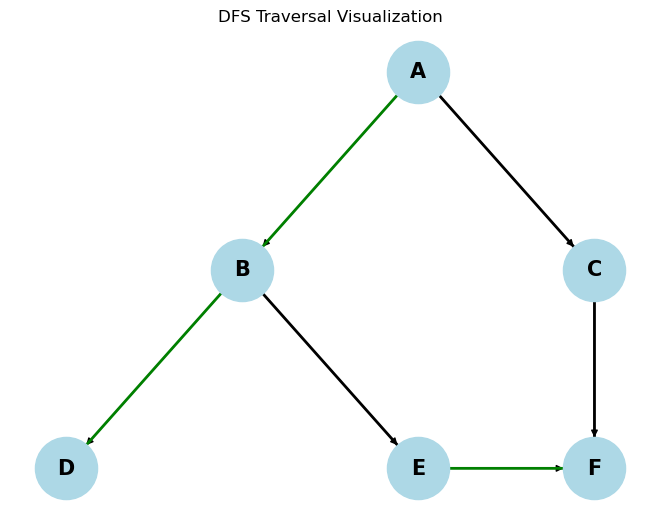

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
graph = nx.DiGraph()

# Add nodes and edges
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('E', 'F')]
graph.add_edges_from(edges)

# Perform DFS traversal
dfs_path = ['A', 'B', 'D', 'E', 'F', 'C']

# Define node positions for visualization
pos = {
    'A': (0, 2),
    'B': (-1, 1),
    'C': (1, 1),
    'D': (-2, 0),
    'E': (0, 0),
    'F': (1, 0)
}

# Draw the graph with labels
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_weight='bold', arrows=True)

# Highlight the DFS path
edge_colors = ['green' if (u, v) in zip(dfs_path, dfs_path[1:]) else 'black' for u, v in graph.edges()]
nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), edge_color=edge_colors, width=2)

# Show the plot
plt.title('DFS Traversal Visualization')
plt.show()


# Assignment BFS 

In [6]:
from collections import deque

def bfs(s, e, g):
    # Step 1: Initialize necessary variables
    n = len(g)  # Number of nodes
    visited = [False] * n  # Visited array to track nodes we've already explored
    prev = [-1] * n  # Previous array to reconstruct the path
    queue = deque([s])  # Initialize queue with the start node
    
    # Mark the start node as visited
    visited[s] = True

    # Step 2: Perform BFS
    while queue:
        node = queue.popleft()  # Get the current node
        
        # If we reach the end node, we can stop
        if node == e:
            break
        
        # Explore all neighbors of the current node
        for neighbor in g[node]:
            if not visited[neighbor]:
                queue.append(neighbor)  # Add neighbor to the queue
                visited[neighbor] = True  # Mark as visited
                prev[neighbor] = node  # Record the previous node

    # Step 3: Reconstruct the path from `s` to `e` using `prev` array
    return reconstruct_path(s, e, prev)

def reconstruct_path(s, e, prev):
    # Initialize an empty path
    path = []
    at = e
    
    # Trace back from the end node to the start node
    while at != -1:
        path.append(at)
        at = prev[at]
    
    # Reverse the path to get the correct order (from start to end)
    path.reverse()
    
    # If the start node is not the first in the path, there is no valid path
    if path[0] == s:
        return path
    else:
        return []  # Return an empty list if there's no path

# Example Usage
# Graph represented as an adjacency list
graph = [
    [1, 2],        # Node 0 is connected to Node 1 and Node 2
    [0, 3],        # Node 1 is connected to Node 0 and Node 3
    [0, 3],        # Node 2 is connected to Node 0 and Node 3
    [1, 2, 4],     # Node 3 is connected to Node 1, Node 2, and Node 4
    [3]            # Node 4 is connected to Node 3
]

start_node = 0
end_node = 4

# Find the shortest path using BFS
path = bfs(start_node, end_node, graph)

print("Shortest path from node", start_node, "to node", end_node, ":", path)


Shortest path from node 0 to node 4 : [0, 1, 3, 4]


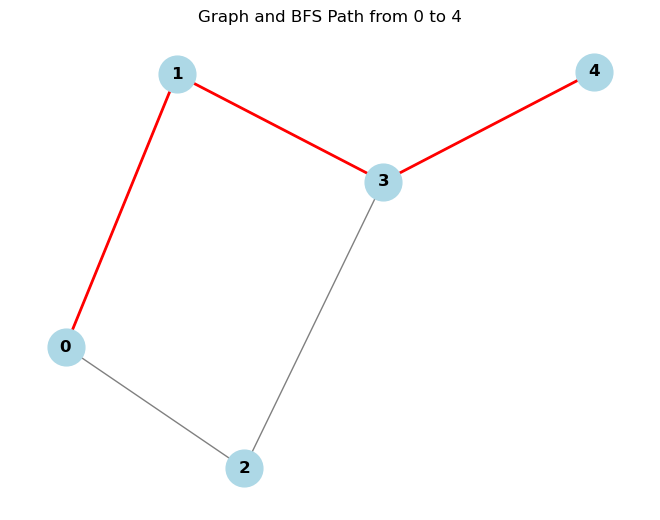

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# BFS function
def bfs(s, e, g):
    n = len(g)  # Number of nodes
    visited = [False] * n  # Visited array
    prev = [-1] * n  # Previous array to store the path
    queue = deque([s])
    
    visited[s] = True
    
    # BFS Algorithm
    while queue:
        node = queue.popleft()
        
        if node == e:
            break
        
        for neighbor in g[node]:
            if not visited[neighbor]:
                queue.append(neighbor)
                visited[neighbor] = True
                prev[neighbor] = node
    
    # Reconstruct and return the path
    return reconstruct_path(s, e, prev)

# Function to reconstruct the path
def reconstruct_path(s, e, prev):
    path = []
    at = e
    while at != -1:
        path.append(at)
        at = prev[at]
    path.reverse()
    if path[0] == s:
        return path
    return []

# Graph definition using adjacency list
graph = [
    [1, 2],    # Node 0
    [0, 3],    # Node 1
    [0, 3],    # Node 2
    [1, 2, 4], # Node 3
    [3]        # Node 4
]

start_node = 0
end_node = 4

# Find the path using BFS
path = bfs(start_node, end_node, graph)

# Graphical representation of the graph
def draw_graph(g, path):
    # Create a graph object
    G = nx.Graph()
    
    # Add nodes and edges from the adjacency list
    for i in range(len(g)):
        for j in g[i]:
            G.add_edge(i, j)
    
    # Positioning the nodes in the graph layout
    pos = nx.spring_layout(G)
    
    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_color="lightblue", font_weight="bold", node_size=700, edge_color="gray")
    
    # Highlight the BFS path
    if path:
        edges_in_path = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='red', width=2)
    
    plt.title(f"Graph and BFS Path from {start_node} to {end_node}")
    plt.show()

# Visualize the graph and the BFS path
draw_graph(graph, path)


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to perform Depth First Search (DFS)
def dfs(image, x, y, visited):
    rows, cols = image.shape
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
    stack = [(x, y)]
    visited[x][y] = True
    component = [(x, y)]
    
    while stack:
        cur_x, cur_y = stack.pop()
        for direction in directions:
            new_x, new_y = cur_x + direction[0], cur_y + direction[1]
            if 0 <= new_x < rows and 0 <= new_y < cols and not visited[new_x][new_y]:
                if image[new_x, new_y] == 255:
                    visited[new_x][new_y] = True
                    stack.append((new_x, new_y))
                    component.append((new_x, new_y))
                    
    return component

# Path to the image
image_path = 'path/to/your/image/binary_image.png'

# Check if file exists
if not os.path.exists(image_path):
    print(f"Error: File '{image_path}' does not exist.")
    exit()

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded properly
if image is None:
    print("Error: Image not found or failed to load.")
    exit()

# Threshold the image to binary (0 or 255)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Get the dimensions of the image
rows, cols = binary_image.shape

# Create a visited array to keep track of visited pixels
visited = np.zeros((rows, cols), dtype=bool)

# List to store all the connected components
components = []

# Perform DFS on each unvisited pixel
for i in range(rows):
    for j in range(cols):
        if binary_image[i, j] == 255 and not visited[i, j]:
            component = dfs(binary_image, i, j, visited)
            components.append(component)

# Visualize the result using matplotlib
output_image = np.zeros_like(binary_image)

for idx, component in enumerate(components):
    color_value = (idx + 1) * (255 // len(components))  # Assign unique color for each component
    for (x, y) in component:
        output_image[x, y] = color_value

# Plot the original and connected components
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Connected Components (DFS)")
plt.imshow(output_image, cmap='jet')  # Using jet color map to distinguish components

plt.show()


Error: File 'path/to/your/image/binary_image.png' does not exist.
Error: Image not found or failed to load.


AttributeError: 'NoneType' object has no attribute 'shape'